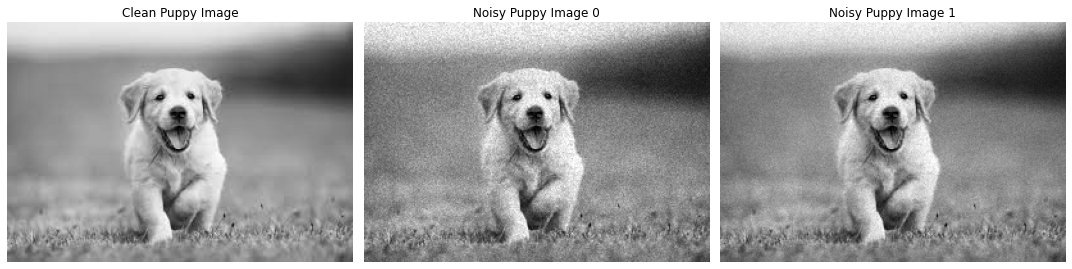

In [13]:
# 1.a

# Required imports
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Paths to images
clean_img_path = 'C:/Users/ompal/given_data/puppy.jpg'           # Clean puppy image
noisy_img1_path = 'C:/Users/ompal/given_data/puppy_noisy_0.jpg'  # Noisy puppy image 0
noisy_img2_path = 'C:/Users/ompal/given_data/puppy_noisy_1.jpg'  # Noisy puppy image 1

# Function to load and check images
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    return image

# Load images
try:
    clean_image = load_image(clean_img_path)
    noisy_image1 = load_image(noisy_img1_path)
    noisy_image2 = load_image(noisy_img2_path)
except FileNotFoundError as e:
    print(e)

# Display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [clean_image, noisy_image1, noisy_image2]
titles = ["Clean Puppy Image", "Noisy Puppy Image 0", "Noisy Puppy Image 1"]

for i, (img, title) in enumerate(zip(images, titles)):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

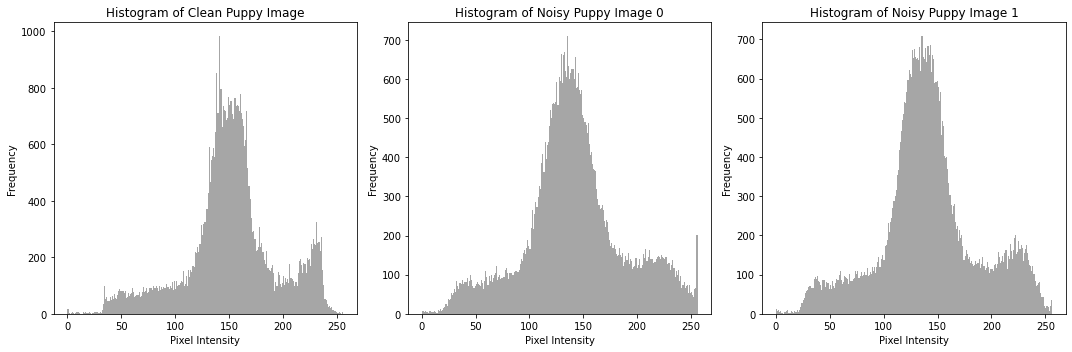

In [15]:
# 1.b

# Function to plot histograms
def plot_histogram(image, title, ax):
    # ravel() - Converts the image matrix into a 1D array of pixel intensities
    # hist() - Displays the frequency of pixel intensities in the range [0, 255]
    ax.hist(image.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7) 
    ax.set_title(title)
    ax.set_xlabel("Pixel Intensity")
    ax.set_ylabel("Frequency")

# Create figure for histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms
plot_histogram(clean_image, "Histogram of Clean Puppy Image", axes[0])
plot_histogram(noisy_image1, "Histogram of Noisy Puppy Image 0", axes[1])
plot_histogram(noisy_image2, "Histogram of Noisy Puppy Image 1", axes[2])

plt.tight_layout()
plt.show()

In [17]:
# 1.c

# Function to find the closest value in the CDF
def find_target_value(pixel_cdf_val: float, clean_cdf: np.ndarray) -> int:
    """
    Finds the index (gray level) in the clean CDF closest to the given pixel CDF value.
    """
    # Compute the absolute difference and find the index of the minimum difference
    min_index = np.argmin(np.abs(clean_cdf - pixel_cdf_val))
    return min_index

In [19]:
# 1.c

# The function performs histogram matching using the CDFs of the noisy and clean images
def match_histograms(image_clean: np.ndarray, image_noisy: np.ndarray) -> np.ndarray:
    """
    Matches the histogram of the noisy image to the clean image.
    """
    assert image_clean.shape == image_noisy.shape, "Images must have the same shape"

    # Calculate histograms and normalize them to get PDF
    hist_clean, _ = np.histogram(image_clean, bins=256, range=(0, 256))
    hist_noisy, _ = np.histogram(image_noisy, bins=256, range=(0, 256))

    # Calculate the CDFs by accumulating the PDFs
    cdf_clean = np.cumsum(hist_clean).astype(float) / hist_clean.sum()
    cdf_noisy = np.cumsum(hist_noisy).astype(float) / hist_noisy.sum()

    # Create an empty array to store the matched image
    image_noisy_matched = np.zeros_like(image_noisy, dtype=np.uint8)

    # Apply histogram matching
    for gray_level in range(256):
        target_gray = find_target_value(cdf_noisy[gray_level], cdf_clean)
        image_noisy_matched[image_noisy == gray_level] = target_gray

    return image_noisy_matched

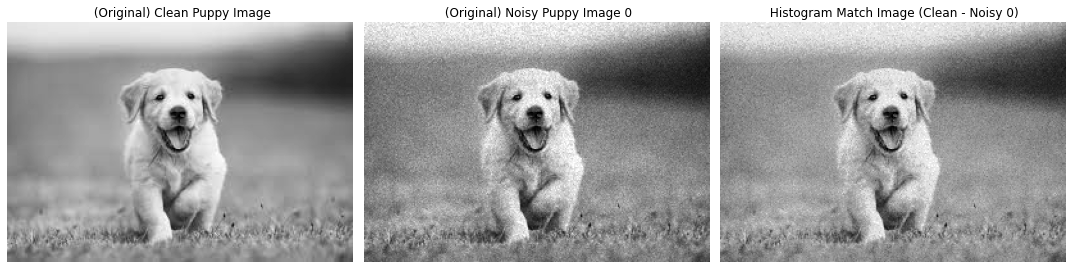

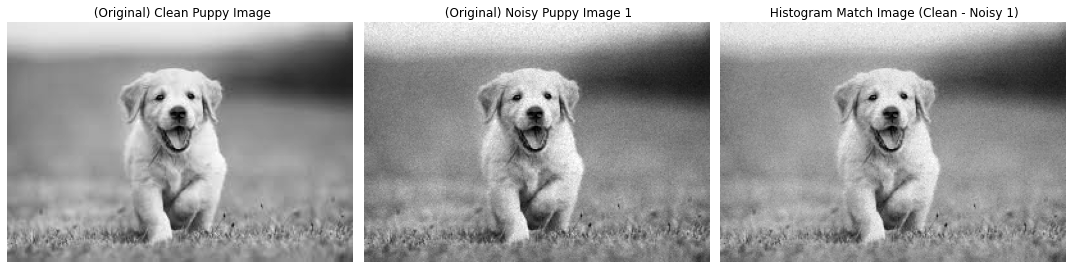

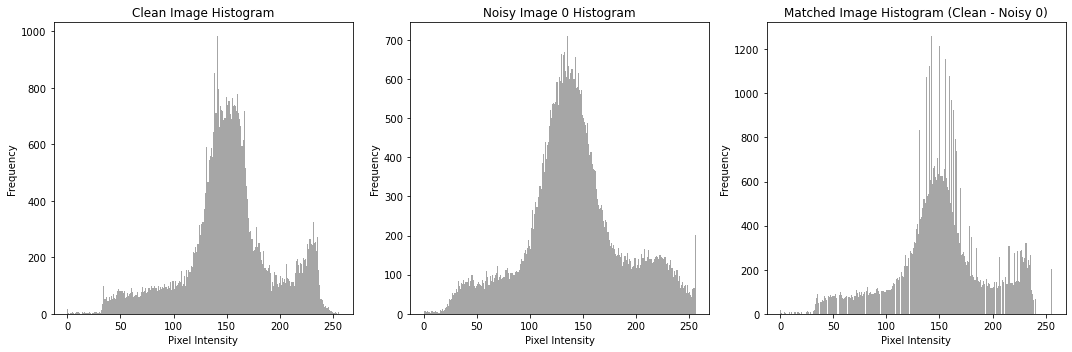

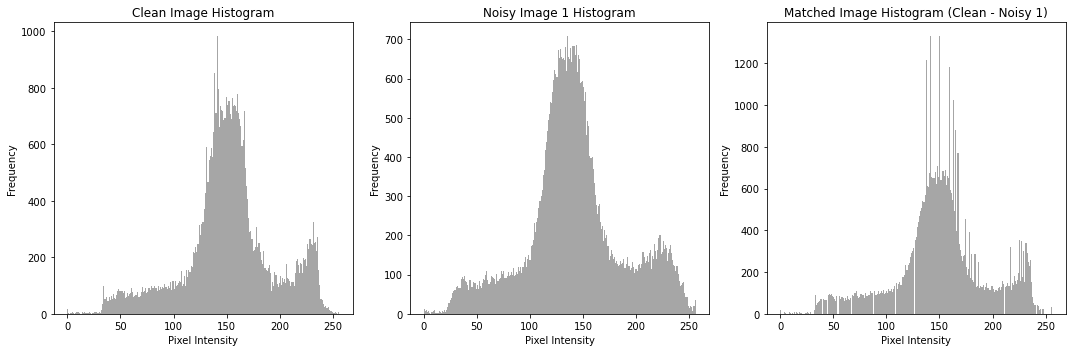

MSE (Clean vs Noisy 0): 270.24
MSE (Clean vs Matched 0): 118.37
MSE (Clean vs Noisy 1): 184.75
MSE (Clean vs Matched 1): 52.73


In [25]:
# 1.d

# Run histogram matching
matched_image1 = match_histograms(clean_image, noisy_image1)
matched_image2 = match_histograms(clean_image, noisy_image2)

# Function to display images side by side
def display_images(clean, noisy, matched, title1, title2):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(clean, cmap='gray')
    axes[0].set_title(f" ({title1}) Clean Puppy Image")
    axes[0].axis('off')

    axes[1].imshow(noisy, cmap='gray')
    axes[1].set_title(f" ({title1}) Noisy Puppy Image {title2}")
    axes[1].axis('off')

    axes[2].imshow(matched, cmap='gray')
    axes[2].set_title(f" Histogram Match Image (Clean - Noisy {title2})")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Display results for both noisy images
display_images(clean_image, noisy_image1, matched_image1, "Original", "0")
display_images(clean_image, noisy_image2, matched_image2, "Original", "1")

#################################################################################################################################

# Function to display histograms
def display_histograms(clean, noisy, matched, title1):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    plot_histogram(clean, "Clean Image Histogram", axes[0])
    plot_histogram(noisy, f"Noisy Image {title1} Histogram", axes[1])
    plot_histogram(matched, f"Matched Image Histogram (Clean - Noisy {title1})", axes[2])
    plt.tight_layout()
    plt.show()

# Display histograms for both cases
display_histograms(clean_image, noisy_image1, matched_image1, "0")
display_histograms(clean_image, noisy_image2, matched_image2, "1")

#################################################################################################################################

# Function to calculate MSE
def calculate_mse(image1: np.ndarray, image2: np.ndarray) -> float:
    return np.mean((image1.astype("float") - image2.astype("float"))**2)

# Calculate MSE
mse_noisy1 = calculate_mse(clean_image, noisy_image1)
mse_matched1 = calculate_mse(clean_image, matched_image1)

mse_noisy2 = calculate_mse(clean_image, noisy_image2)
mse_matched2 = calculate_mse(clean_image, matched_image2)

# Print MSE results
print(f"MSE (Clean vs Noisy 0): {mse_noisy1:.2f}")
print(f"MSE (Clean vs Matched 0): {mse_matched1:.2f}")
print(f"MSE (Clean vs Noisy 1): {mse_noisy2:.2f}")
print(f"MSE (Clean vs Matched 1): {mse_matched2:.2f}")

In [27]:
# 2.a

import cv2
import numpy as np

def video_to_frames(vid_path: str, start_second: int, end_second: int) -> np.ndarray:
    """
    Load a video and return its frames from the specified time range.
    
    :param vid_path: Path to the video file.
    :param start_second: Time (in seconds) of the first frame to capture.
    :param end_second: Time (in seconds) of the last frame to capture.
    :return: A 4D uint8 numpy array of shape [num_of_frames x H x W x C] containing the extracted frames.
    """
    # Open the video file
    cap = cv2.VideoCapture(vid_path)
    if not cap.isOpened():
        raise FileNotFoundError(f"Cannot open video file: {vid_path}")

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
    start_frame = start_second * fps
    end_frame = end_second * fps
    
    # List to store the frames
    frame_list = []

    # Read the frames in the specified range
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    for i in range(start_frame, end_frame + 1):
        ret, frame = cap.read()
        if not ret:
            break  # End of video or error reading frame
        frame_list.append(frame)

    cap.release()

    # Convert list to numpy array
    frame_set = np.array(frame_list, dtype=np.uint8)
    
    return frame_set

In [29]:
# 2.b

import numpy as np
import cv2

def match_corr(corr_obj: np.ndarray, img: np.ndarray) -> tuple:
    """
    Perform 2D correlation between 'corr_obj' and 'img' and return the location (indices) 
    of 'corr_obj's center within 'img'.
    
    :param corr_obj: 2D numpy array [H_obj x W_obj] containing an image component (e.g., a patch).
    :param img: 2D numpy array [H_img x W_img] containing an image in which to find the patch.
    :return: Tuple (x, y) - center coordinates of the 'corr_obj' in 'img'.
    """
    # Calculate the maximum correlation value of 'corr_obj' with itself
    max_obj = np.sum(corr_obj.astype(np.float32) ** 2)

    # Perform 2D correlation using cv2.filter2D
    correlation_map = cv2.filter2D(src=img.astype(np.float32), ddepth=-1,
                                   kernel=corr_obj.astype(np.float32),
                                   borderType=cv2.BORDER_CONSTANT)

    # Find the location in 'img' where the correlation is closest to max_obj
    y, x = np.unravel_index(np.argmin(np.abs(correlation_map - max_obj)), correlation_map.shape)

    # Calculate the center coordinates of 'corr_obj' within 'img'
    h_obj, w_obj = corr_obj.shape
    center_x = x + w_obj // 2
    center_y = y + h_obj // 2

    return center_y, center_x

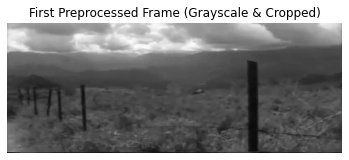

In [41]:
# 2.c

import cv2
import numpy as np

# Load frames in the given time range (4:10 to 4:20)
video_path = 'C:/Users/ompal/given_data/Corsica.mp4' # Corsica music video
frames = video_to_frames(video_path, 250, 260)  # 4:10 to 4:20

# Pre-process the frames
preprocessed_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Crop the frame (height: lower two-thirds, width: indices 7 to 627)
    h, w = gray_frame.shape
    cropped_frame = gray_frame[h // 3:, 7:627]  # lower two-thirds height, Excluded black margins
    
    preprocessed_frames.append(cropped_frame)

preprocessed_frames = np.array(preprocessed_frames)

# Display one of the 250 processed frames
plt.imshow(preprocessed_frames[0], cmap='gray')
plt.title("First Preprocessed Frame (Grayscale & Cropped)")
plt.axis('off')
plt.show()

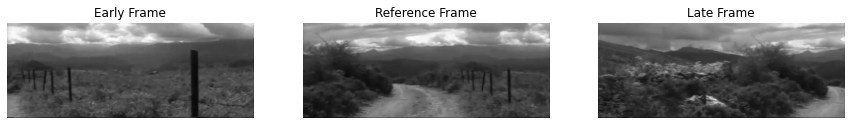

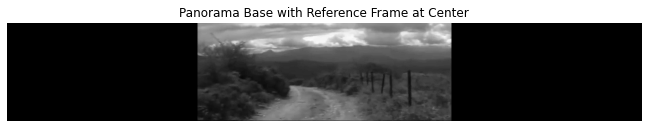

In [225]:
# 2.d

import numpy as np
import matplotlib.pyplot as plt

# Preprocessed frames from section 2.c
frame_height, frame_width = preprocessed_frames[0].shape

# 1. Create the panorama base (zeros array)
panorama_width = int(2.5 * frame_width)
panorama_base = np.zeros((frame_height, panorama_width), dtype=np.uint8)

# 2. Select the reference frame (middle frame in the 10-second interval)
ref_index = len(preprocessed_frames) // 2  # Middle frame index
reference_frame = preprocessed_frames[ref_index]

# Insert the reference frame in the center of the panorama base
center_x = panorama_width // 2
left_x = center_x - frame_width // 2
right_x = left_x + frame_width

panorama_base[:, left_x:right_x] = reference_frame

# 3. Select two additional frames (earlier and later)
early_frame = preprocessed_frames[ref_index - 120]  # 120 frames before the reference
late_frame = preprocessed_frames[ref_index + 120]  # 120 frames after the reference

# Display the reference frame and the early and late frames
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(early_frame, cmap='gray')
plt.title("Early Frame")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(reference_frame, cmap='gray')
plt.title("Reference Frame")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(late_frame, cmap='gray')
plt.title("Late Frame")
plt.axis('off')
plt.show()

# Display the Panorama with the reference frame
plt.figure(figsize=(25, 5)) # Adjusting the display to be the same height and x2.5 wider
plt.subplot(1, 2, 2)
plt.imshow(panorama_base, cmap='gray')
plt.title("Panorama Base with Reference Frame at Center")
plt.axis('off')
plt.show()




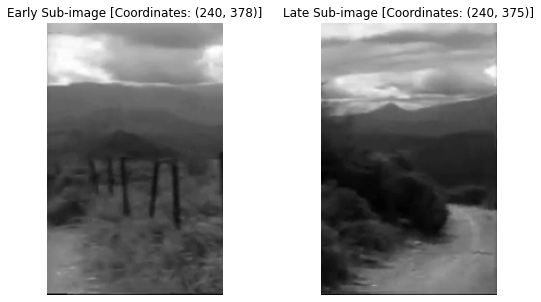

In [345]:
# 2.e

import matplotlib.pyplot as plt

# Choose sub-images 
sub_img_height, sub_img_width = early_frame.shape[0], early_frame.shape[1] // 4
early_sub_img = early_frame[:, :sub_img_width]  # Quarter left portion of the early frame
late_sub_img = late_frame[:, -sub_img_width:]  # Quarter right portion of the late frame

# Apply match_corr for both early and late sub-images
early_match_coord = match_corr(reference_frame, early_sub_img)
late_match_coord = match_corr(reference_frame, late_sub_img)

# Display the sub-images with titles showing their match_corr coordinates
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.imshow(early_sub_img, cmap='gray')
plt.title(f"Early Sub-image [Coordinates: {early_match_coord}]")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(late_sub_img, cmap='gray')
plt.title(f"Late Sub-image [Coordinates: {late_match_coord}]")
plt.axis('off')

plt.show()

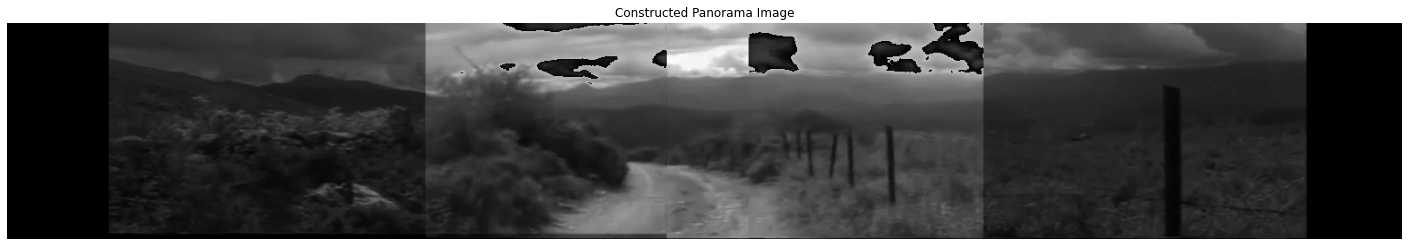

In [341]:
# 2.f

# Create a copy of the panorama base to work on
panorama_result = np.copy(panorama_base)

# Displacement values from match_corr results
early_displacement_y, early_displacement_x = early_match_coord
late_displacement_y, late_displacement_x = late_match_coord


# Shift the late frame up by 8 pixels
vertical_shift = 5  # positive value shifts up

# Create a new shifted late frame with zeros at the bottom
shifted_late_frame = np.zeros_like(late_frame)  # initialize with zeros
shifted_late_frame[:-vertical_shift, :] = late_frame[vertical_shift:, :]  # shift up and replace bottom with zeros
#####

# Insert the early frame into the panorama
early_start_x = 824  # 824 achieved manually untill the image fit
early_end_x = early_start_x + frame_width
panorama_result[:, early_start_x:early_end_x] = (panorama_result[:, early_start_x:early_end_x] + early_frame) // 2

# Insert the late frame into the panorama
late_start_x = 113 # 113 achieved manually untill the image fit
late_end_x = late_start_x + frame_width
panorama_result[:, late_start_x:late_end_x] = (panorama_result[:, late_start_x:late_end_x] + shifted_late_frame) // 2

# Display the panorama result
plt.figure(figsize=(25, 8))
plt.imshow(panorama_result, cmap='gray')
plt.title("Constructed Panorama Image")
plt.axis('off')
plt.show()



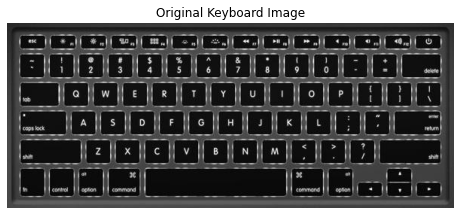

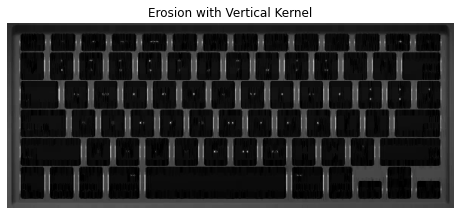

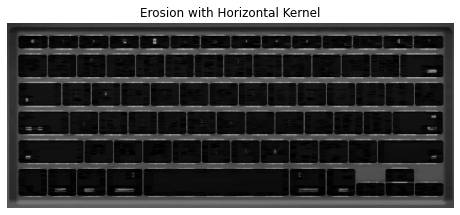

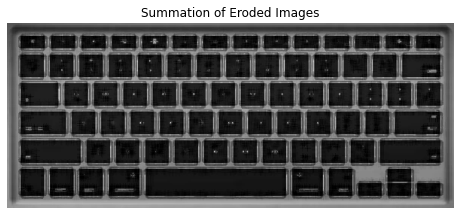

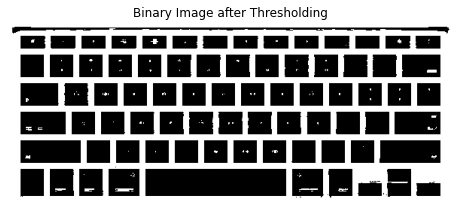

In [347]:
# 3.a

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and display the image
image_path = 'C:/Users/ompal/given_data/keyboard.jpg' # Keyboard Image
keyboard_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 8))
plt.imshow(keyboard_image, cmap='gray')
plt.title('Original Keyboard Image')
plt.axis('off')
plt.show()

# Create morphological kernels
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 8))  # Vertical line 8 pixels long
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 1))  # Horizontal line 8 pixels long

# Apply erosion using the vertical kernel
eroded_vertical = cv2.erode(keyboard_image, vertical_kernel)

plt.figure(figsize=(8, 8))
plt.imshow(eroded_vertical, cmap='gray')
plt.title('Erosion with Vertical Kernel')
plt.axis('off')
plt.show()

# Apply erosion using the horizontal kernel
eroded_horizontal = cv2.erode(keyboard_image, horizontal_kernel)

plt.figure(figsize=(8, 8))
plt.imshow(eroded_horizontal, cmap='gray')
plt.title('Erosion with Horizontal Kernel')
plt.axis('off')
plt.show()

# Sum the two eroded images
summed_image = cv2.add(eroded_vertical, eroded_horizontal)

plt.figure(figsize=(8, 8))
plt.imshow(summed_image, cmap='gray')
plt.title('Summation of Eroded Images')
plt.axis('off')
plt.show()

# Apply threshold to create a binary image (0 and 255)
threshold_value = int(0.2 * 255)
_, binary_image = cv2.threshold(summed_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 8))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image after Thresholding')
plt.axis('off')
plt.show()

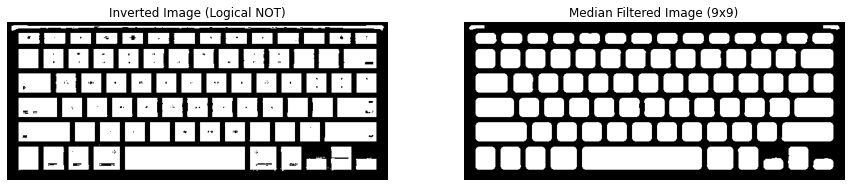

In [370]:
# 3.b

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the binary image from the last step 
image_path = 'C:/Users/ompal/given_data/keyboard.jpg' # Keyboard image

# Sum the two eroded images
summed_image = cv2.add(eroded_vertical, eroded_horizontal)

# Apply threshold to create a binary image (0 and 255)
threshold_value = int(0.2 * 255)
_, binary_image = cv2.threshold(summed_image, threshold_value, 255, cv2.THRESH_BINARY)

# Perform logical inversion (NOT operation)
inverted_image = cv2.bitwise_not(binary_image)

# Apply a median filter with a 9x9 kernel
median_filtered_image = cv2.medianBlur(inverted_image, 9)

# Display the inverted and median-filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(inverted_image, cmap='gray')
plt.title("Inverted Image (Logical NOT)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered Image (9x9)")
plt.axis('off')

plt.show()

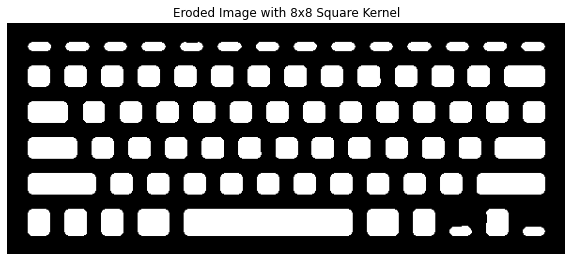

In [368]:
# 3.c

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Use the median-filtered binary image from section 3.b
binary_image = median_filtered_image  # This should come from the previous step

# Create a square morphological kernel of size 8x8
square_kernel = np.ones((8, 8), np.uint8)

# Apply erosion using the square kernel
eroded_image = cv2.erode(binary_image, square_kernel, iterations=1)

# Display the eroded image
plt.figure(figsize=(10, 5))
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image with 8x8 Square Kernel")
plt.axis('off')
plt.show()

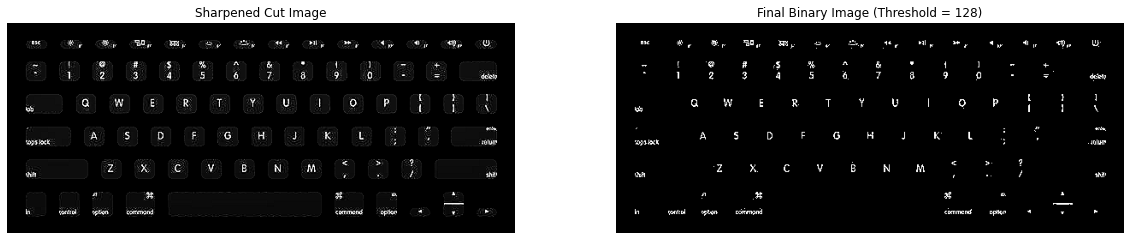

In [417]:
# 3.d

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the grayscale image (original image)
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the binary image to 0, 1 values
binary_image_0_1 = (binary_image // 255).astype(np.uint8)

# Perform intersection with the original image
intersected_image = original_image * binary_image_0_1

# Define the sharpening kernel K
kernel_K = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

# Apply the sharpening filter using cv2.filter2D
sharpened_image = cv2.filter2D(intersected_image, -1, kernel_K)

# Display the sharpened result
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Cut Image")
plt.axis('off')

# Apply a final binary threshold to get a binary image with 0, 255 values
final_threshold_value = 128
_, final_binary_image = cv2.threshold(sharpened_image, final_threshold_value, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 2)
plt.imshow(final_binary_image, cmap='gray')
plt.title(f"Final Binary Image (Threshold = {final_threshold_value})")
plt.axis('off')
plt.show()